In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

In [2]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 50

### Load in the data

In [3]:
## Read in 2018 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_Y2018/flight_data_2018.csv.zip",  low_memory=False)

In [4]:
airlines = pd.read_csv("../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airline_mapper = airlines.set_index("Code")["Description"]

### Clean the data

In [18]:

SELECTED_COLUMNS = [
    "FlightDate",
    "Operating_Airline ",
    "Tail_Number",
    "Flight_Number_Operating_Airline",
    "OriginAirportID",
    "Origin",
    "OriginCityName",
    "OriginState",
    "OriginStateName",
    "DestAirportID",
    "Dest",
    "DestCityName",
    "DestState",
    "DestStateName",
    "CRSDepTime",
    "DepTime",
    "DepDelay",
    "DepDel15",
    "DepartureDelayGroups",
    "DepTimeBlk",
    "TaxiOut",
    "WheelsOn",
    "TaxiIn",
    "CRSArrTime",
    "ArrDelayMinutes",
    "ArrDel15",
    "ArrivalDelayGroups",
    "ArrTimeBlk",
    "Cancelled",
    "CancellationCode",
    "Diverted",
    "CRSElapsedTime",
    "AirTime",
    "Flights",
    "Distance",
    "DistanceGroup",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    "FirstDepTime",
    "TotalAddGTime",
]

In [15]:
def airline_mapping(df_flights):
    df_flights["Operating_Airline"] = (df_flights["Operating_Airline"].map(airline_mapper))
    df_flights["CancellationCode"] = (df_flights["CancellationCode"].map(cancellation_code_mapper))
    return df_flights

def tweak_df_flights(df_flights):
    df_flights = (
        df_flights[SELECTED_COLUMNS]
        .copy()
        .rename(columns={"Operating_Airline ": "Operating_Airline"})
    )
    df_flights.pipe(airline_mapping)
    return df_flights.assign(
        DepTime=df_flights.DepTime.fillna(0).astype("float16"),
        DepDelay=df_flights.DepDelay.fillna(0).astype("float16"),
        DepDel15=df_flights.DepDel15.fillna(0).astype("float16"),
        DepartureDelayGroups=df_flights.DepartureDelayGroups.fillna(0).astype("float16"),
        TaxiOut=df_flights.TaxiOut.fillna(0).astype("float16"),
        WheelsOn=df_flights.WheelsOn.fillna(0).astype("float16"),
        TaxiIn=df_flights.TaxiIn.fillna(0).astype("float16"),
        ArrDel15=df_flights.ArrDel15.fillna(0).astype("float16"),
        ArrivalDelayGroups=df_flights.ArrivalDelayGroups.fillna(0).astype("float16"),
        CRSElapsedTime=df_flights.CRSElapsedTime.fillna(0).astype("float16"),
        AirTime=df_flights.AirTime.fillna(0).astype("float16"),
        Flights=df_flights.Flights.fillna(0).astype("float16"),
        Distance=df_flights.Distance.fillna(0).astype("float16"),
        CarrierDelay=df_flights.CarrierDelay.fillna(0).astype("float16"),
        WeatherDelay=df_flights.WeatherDelay.fillna(0).astype("float16"),
        NASDelay=df_flights.NASDelay.fillna(0).astype("float16"),
        SecurityDelay=df_flights.SecurityDelay.fillna(0).astype("float16"),
        LateAircraftDelay=df_flights.LateAircraftDelay.fillna(0).astype("float16"),
        FirstDepTime=df_flights.FirstDepTime.fillna(0).astype("float16"),
        TotalAddGTime=df_flights.TotalAddGTime.fillna(0).astype("float16"),
        CancellationCode=df_flights.CancellationCode.fillna("none").astype("category"),
        Tail_Number=df_flights.Tail_Number.fillna("none").astype("category"),
        FlightDate=pd.to_datetime(df_flights.FlightDate),
    ).astype(
        {
            "Operating_Airline": "category",
            "Origin": "category",
            "Dest": "category",
            "DestState": "category",
            "OriginState": "category",
            "OriginCityName": "category",
            "OriginStateName": "category",
            "DestStateName": "category",
            "DestCityName": "category",
            "DepTimeBlk": "category",
            "ArrTimeBlk": "category",
            "Cancelled": "bool",
            "Diverted": "bool",
            "OriginAirportID": "int16",
            "DestAirportID": "int16",
            "CRSDepTime": "int16",
            "CRSArrTime": "int16",
            "DistanceGroup": "int16",
            "Flight_Number_Operating_Airline": "int16",
            "Flights": "int16",
        }
    )


df_flights = tweak_df_flights(df_flights)
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginStateName                  category      
 8   OriginState                      category      
 9   DestAirportID                    int16         
 10  Dest                             category      
 11  DestCityName                     category      
 12  DestState                        category      
 13  DestStateName                    category      
 14  CRSDepTime                       i

In [16]:
df_flights.shape

(5689512, 21)

## Statistical Analysis

#### Correlation matrix

In [17]:
df_flights.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginStateName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,Cancelled,CancellationCode,Diverted
0,2018-01-23,NaN,N8928A,3298,10146,ABY,"Albany, GA",Georgia,GA,10397,ATL,"Atlanta, GA",GA,Georgia,1202,1157.0,-5.0,0.0,False,none,False
1,2018-01-24,NaN,N800AY,3298,10146,ABY,"Albany, GA",Georgia,GA,10397,ATL,"Atlanta, GA",GA,Georgia,1202,1157.0,-5.0,0.0,False,none,False
2,2018-01-25,NaN,N8836A,3298,10146,ABY,"Albany, GA",Georgia,GA,10397,ATL,"Atlanta, GA",GA,Georgia,1202,1153.0,-9.0,0.0,False,none,False
3,2018-01-26,NaN,N800AY,3298,10146,ABY,"Albany, GA",Georgia,GA,10397,ATL,"Atlanta, GA",GA,Georgia,1202,1150.0,-12.0,0.0,False,none,False
4,2018-01-27,NaN,N8839E,3298,10146,ABY,"Albany, GA",Georgia,GA,10397,ATL,"Atlanta, GA",GA,Georgia,1400,1355.0,-5.0,0.0,False,none,False


In [19]:
df_flights.filter(regex=r'Origin')

,OriginAirportID,Origin,OriginCityName,OriginState
0,11697,FLL,"Fort Lauderdale, FL",FL
1,10397,ATL,"Atlanta, GA",GA
2,11697,FLL,"Fort Lauderdale, FL",FL
3,11697,FLL,"Fort Lauderdale, FL",FL
4,10397,ATL,"Atlanta, GA",GA
5,12448,JAN,"Jackson/Vicksburg, MS",MS
6,14524,RIC,"Richmond, VA",VA
7,13487,MSP,"Minneapolis, MN",MN
8,10397,ATL,"Atlanta, GA",GA
9,14492,RDU,"Raleigh/Durham, NC",NC


In [9]:
corr = (df_flights
        .select_dtypes('float16')
        .corr())
corr.style.background_gradient(cmap='coolwarm')

,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
DepTime,1.000000,0.133076,0.129948,0.250080,0.191388,0.131614,0.969472,0.693240,0.063722,0.663341,0.126421,0.120610,0.222469,0.172232,-0.013604,0.110510,0.091511,-0.004102,0.039401,0.021194,0.057190,0.004569,0.127657,0.040475,0.024034,0.024079
DepDelay,0.133076,1.000000,0.997910,0.548335,0.821624,0.051616,0.122346,0.036071,0.017112,0.029398,0.964055,0.972308,0.508926,0.770756,0.022724,0.035210,0.028413,0.021589,0.731257,0.275693,0.242059,0.038098,0.591870,0.194756,0.195455,0.193704
DepDelayMinutes,0.129948,0.997910,1.000000,0.530038,0.807738,0.054493,0.119551,0.035403,0.022915,0.029179,0.961990,0.975506,0.494021,0.758582,0.018152,0.034029,0.026230,0.016364,0.736442,0.277687,0.240199,0.037885,0.592094,0.194445,0.196090,0.194277
DepDel15,0.250080,0.548335,0.530038,1.000000,0.749702,0.061194,0.239661,0.123818,0.007356,0.112351,0.531001,0.485089,0.747034,0.683952,0.029611,0.056191,0.049983,0.033488,0.289182,0.108302,0.169526,0.030617,0.375331,0.131456,0.102410,0.103359
DepartureDelayGroups,0.191388,0.821624,0.807738,0.749702,1.000000,0.052532,0.176179,0.051593,0.009093,0.041560,0.795042,0.772539,0.679143,0.921125,0.031511,0.036633,0.030629,0.031070,0.478633,0.198134,0.238486,0.035971,0.591963,0.203157,0.189236,0.189724
TaxiOut,0.131614,0.051616,0.054493,0.061194,0.052532,1.000000,0.157956,0.152091,0.073699,0.148759,0.176186,0.154931,0.244984,0.226467,0.076168,0.254566,0.122944,0.037387,0.045944,0.054930,0.293551,0.002973,0.035166,0.018473,0.019728,0.020374
WheelsOff,0.969472,0.122346,0.119551,0.239661,0.176179,0.157956,1.000000,0.716570,0.067224,0.686509,0.121537,0.115665,0.219987,0.165193,-0.022760,0.108453,0.085455,-0.016689,0.036328,0.020650,0.062573,0.004569,0.119430,0.013385,-0.009408,-0.008928
WheelsOn,0.693240,0.036071,0.035403,0.123818,0.051593,0.152091,0.716570,1.000000,0.095980,0.966094,0.040165,0.039863,0.118113,0.052592,0.015502,0.147855,0.124570,0.016844,0.001937,0.009138,0.048203,0.002280,0.035357,-0.008364,-0.020983,-0.020555
TaxiIn,0.063722,0.017112,0.022915,0.007356,0.009093,0.073699,0.067224,0.095980,1.000000,0.096328,0.108542,0.095400,0.151333,0.136949,0.094655,0.217998,0.124435,0.071899,0.017157,0.017289,0.217296,0.001523,0.024135,-0.000705,-0.002943,-0.002707
ArrTime,0.663341,0.029398,0.029179,0.112351,0.041560,0.148759,0.686509,0.966094,0.096328,1.000000,0.033009,0.033588,0.107704,0.042434,0.012994,0.144158,0.121106,0.013522,-0.000006,0.008498,0.044150,0.002122,0.029027,-0.010242,-0.021792,-0.021403


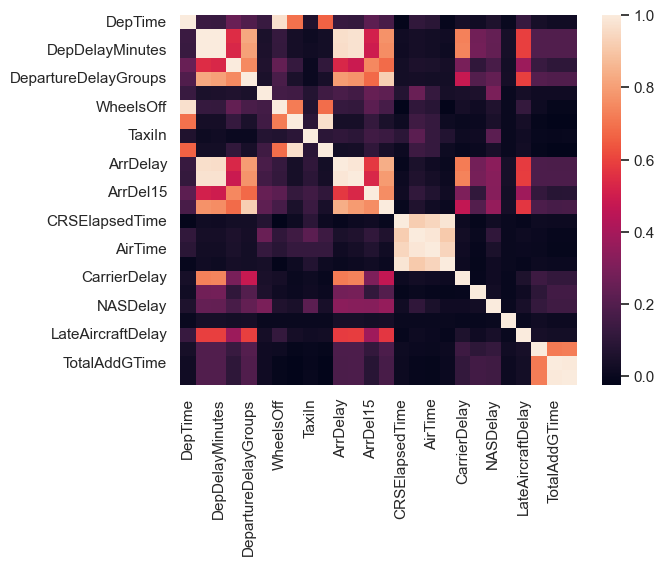

In [10]:
sns.heatmap(
    (df_flights
     .select_dtypes('float16')
     .corr()))
plt.show()


<AxesSubplot: xlabel='FlightDate'>

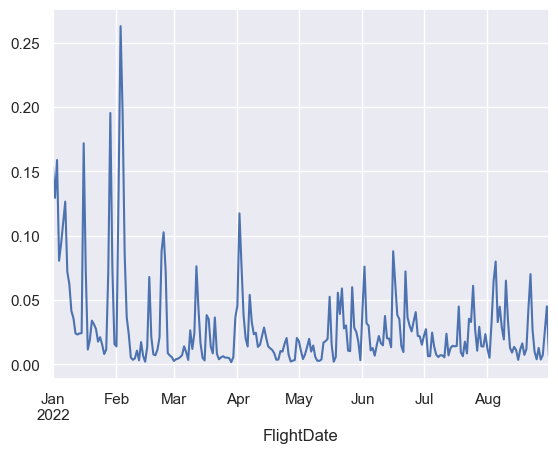

In [11]:
(df_flights.
 groupby("FlightDate")
 ["Cancelled"]
 .agg("mean")
 .plot()
 )


<AxesSubplot: xlabel='FlightDate'>

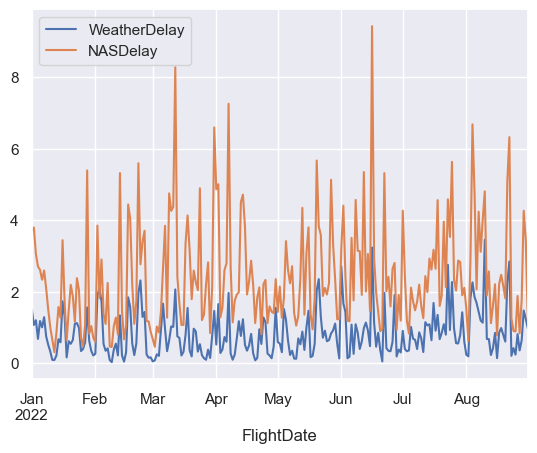

In [12]:
(df_flights.
 groupby("FlightDate")
[["WeatherDelay", "NASDelay"]]
 .agg("mean")
 .plot())

<AxesSubplot: xlabel='FlightDate'>

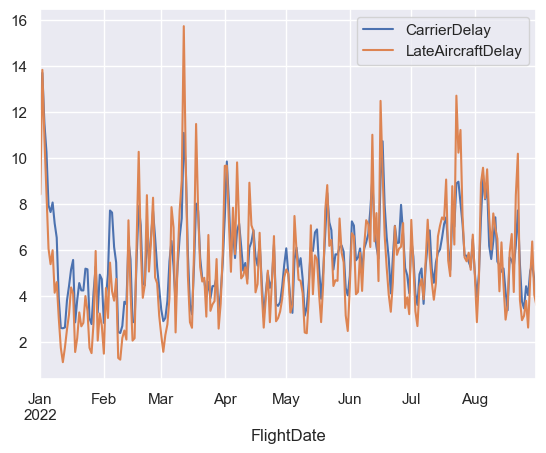

In [13]:
(df_flights.
 groupby("FlightDate")
 [["CarrierDelay","LateAircraftDelay"]]
 .agg("mean")
 .plot())

##### Frequency Distribution Table

In [14]:
(df_flights
 [["Operating_Airline"]]
 .value_counts()
.sort_values(ascending=False)
.to_frame("Row Count")
)

,Row Count
Operating_Airline,
Southwest Airlines Co.,850814
Delta Air Lines Inc.,590787
American Airlines Inc.,574280
SkyWest Airlines Inc.,504520
United Air Lines Inc.,406927
Republic Airlines,224567
JetBlue Airways,179893
Envoy Air,172616
Endeavor Air Inc.,162517


In [15]:
px.bar(
    df_flights["Operating_Airline"]
    .value_counts()
    .sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



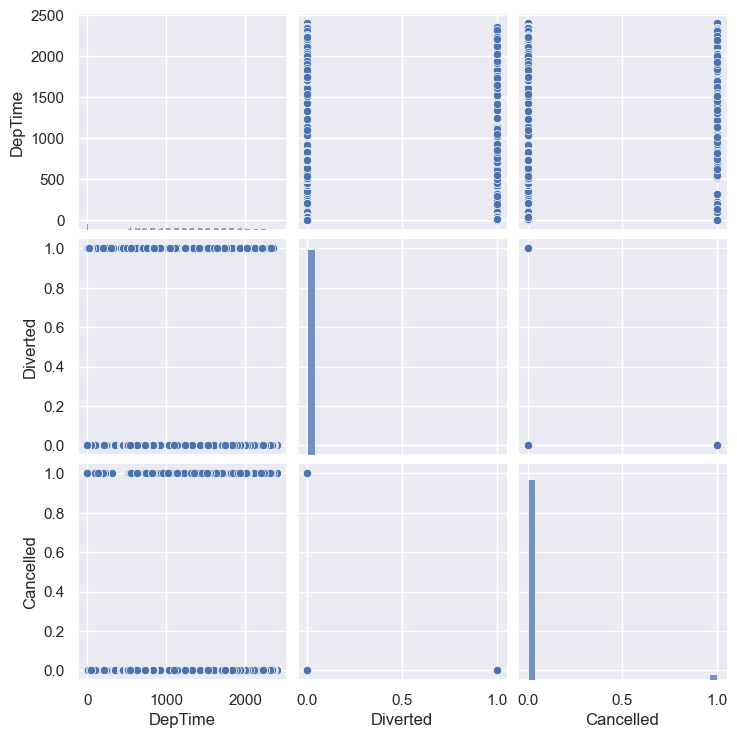

In [16]:
g = sns.pairplot(df_flights[["DepTime", "Diverted", "Cancelled"]])
plt.show()